<a href="https://colab.research.google.com/github/davepy99/RecyclAI/blob/main/CNN_Garbage_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory


In [4]:
# Mount Google Drive - USING .zip dataset from drive and store it in runtime memory
from google.colab import drive
drive.mount('/content/drive')

# Copy the ZIP file from Drive to Colab
!cp "/content/drive/MyDrive/Data&AI Project/CNN Project/archive.zip" .

# Unzip it to a local folder
!unzip -q archive.zip -d garbage_dataset

# Set the dataset path
data_dir = '/content/'

# Optional: List class folders
import os
print("Classes found:", os.listdir(data_dir))

KeyboardInterrupt: 

In [33]:
# data_dir = '/content/drive/MyDrive/Data&AI Project/CNN Project/garbage-dataset'
data_dir = '/content/garbage_dataset/garbage-dataset'

In [34]:
import os

# Replace with your dataset folder path
# data_dir = '/content/garbage_dataset'

# Supported image extensions
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff')

# Count images in each subfolder (class)
for class_name in sorted(os.listdir(data_dir)):
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        image_files = [f for f in os.listdir(class_path) if f.lower().endswith(image_extensions)]
        print(f"{class_name}: {len(image_files)} images")


battery: 944 images
biological: 997 images
cardboard: 1825 images
clothes: 5327 images
glass: 3061 images
metal: 1020 images
paper: 1677 images
plastic: 1984 images
shoes: 1977 images
trash: 947 images


In [7]:
# Collect extensions
extensions = set()

for root, dirs, files in os.walk(data_dir):
    for file in files:
        ext = os.path.splitext(file)[1].lower()
        if ext:
            extensions.add(ext)

# Display results
print("Found file extensions:", extensions)

Found file extensions: {'.png', '.jpeg', '.jpg'}


In [8]:
data_dir

'/content/garbage_dataset/garbage-dataset'

In [4]:
batch_size = 16
img_height = 180
img_width = 180

train_ds = image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print("Classes:", class_names)

Found 19759 files belonging to 10 classes.
Using 15808 files for training.
Found 19759 files belonging to 10 classes.
Using 3951 files for validation.
Classes: ['battery', 'biological', 'cardboard', 'clothes', 'glass', 'metal', 'paper', 'plastic', 'shoes', 'trash']


In [44]:
# train_ds
class_names

['battery',
 'biological',
 'cardboard',
 'clothes',
 'glass',
 'metal',
 'paper',
 'plastic',
 'shoes',
 'trash']

In [5]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

In [11]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Rescaling, Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Input(shape=(180, 180, 3)),                # 👈 proper way to define input shape
    Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(class_names))  # number of output classes
])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
import os
from PIL import Image

data_dir = '/content/garbage_dataset/garbage-dataset'
bad_files = []

for root, dirs, files in os.walk(data_dir):
    for file in files:
        file_path = os.path.join(root, file)
        try:
            with Image.open(file_path) as img:
                img.verify()  # Check if it's a valid image
        except:
            bad_files.append(file_path)

print(f"Found {len(bad_files)} invalid or unsupported images.")
for bf in bad_files[:10]:  # show first 10
    print(bf)


Found 0 invalid or unsupported images.


In [36]:
import os
import imghdr

bad_format_files = []

for root, dirs, files in os.walk(data_dir):
    for file in files:
        path = os.path.join(root, file)
        detected_format = imghdr.what(path)
        ext = os.path.splitext(file)[1].lower().replace('.', '')

        if detected_format != ext:
            bad_format_files.append((path, detected_format, ext))

print(f"Found {len(bad_format_files)} files with mismatched or undetectable formats.")
for bf in bad_format_files[:10]:
    print("File:", bf[0], "| Detected:", bf[1], "| Extension:", bf[2])


/tmp/ipython-input-36-505907589.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


Found 19730 files with mismatched or undetectable formats.
File: /content/garbage_dataset/garbage-dataset/shoes/shoes_1238.jpg | Detected: jpeg | Extension: jpg
File: /content/garbage_dataset/garbage-dataset/shoes/shoes_672.jpg | Detected: jpeg | Extension: jpg
File: /content/garbage_dataset/garbage-dataset/shoes/shoes_1618.jpg | Detected: jpeg | Extension: jpg
File: /content/garbage_dataset/garbage-dataset/shoes/shoes_1524.jpg | Detected: jpeg | Extension: jpg
File: /content/garbage_dataset/garbage-dataset/shoes/shoes_521.jpg | Detected: jpeg | Extension: jpg
File: /content/garbage_dataset/garbage-dataset/shoes/shoes_1237.jpg | Detected: jpeg | Extension: jpg
File: /content/garbage_dataset/garbage-dataset/shoes/shoes_1739.jpg | Detected: jpeg | Extension: jpg
File: /content/garbage_dataset/garbage-dataset/shoes/shoes_1398.jpg | Detected: jpeg | Extension: jpg
File: /content/garbage_dataset/garbage-dataset/shoes/shoes_255.jpg | Detected: jpeg | Extension: jpg
File: /content/garbage_dat

In [38]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Load with batch_size = 1 for fine-grained tracing
test_ds = image_dataset_from_directory(
    data_dir,
    image_size=(180, 180),
    batch_size=1
)

print("Starting image-by-image validation...")

for i, (img, label) in enumerate(test_ds):
    if i % 500 == 0:
        print(f"Checked {i} images...")


Found 19762 files belonging to 10 classes.
Starting image-by-image validation...
Checked 0 images...
Checked 500 images...
Checked 1000 images...
Checked 1500 images...
Checked 2000 images...
Checked 2500 images...
Checked 3000 images...
Checked 3500 images...
Checked 4000 images...
Checked 4500 images...
Checked 5000 images...


InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]] [Op:IteratorGetNext] name: 

In [48]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
import os

# data_dir = '/content/garbage_dataset'

# Build a list of all image file paths
image_paths = []
for root, dirs, files in os.walk(data_dir):
    for file in sorted(files):
        if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
            image_paths.append(os.path.join(root, file))

print(f"Total images: {len(image_paths)}")

# Try loading each file directly with tf.io.decode_image
import tensorflow as tf

for i, path in enumerate(image_paths):
    try:
        img_raw = tf.io.read_file(path)
        tf.image.decode_image(img_raw)
    except Exception as e:
        print(f"\n❌ Corrupted image at index {i}: {path}")
        print(f"Error: {e}")
        break
    if i % 500 == 0:
        print(f"✅ Checked {i} images...")


Total images: 19759
✅ Checked 0 images...
✅ Checked 500 images...
✅ Checked 1000 images...
✅ Checked 1500 images...
✅ Checked 2000 images...
✅ Checked 2500 images...
✅ Checked 3000 images...
✅ Checked 3500 images...
✅ Checked 4000 images...
✅ Checked 4500 images...
✅ Checked 5000 images...
✅ Checked 5500 images...
✅ Checked 6000 images...
✅ Checked 6500 images...
✅ Checked 7000 images...
✅ Checked 7500 images...
✅ Checked 8000 images...
✅ Checked 8500 images...
✅ Checked 9000 images...
✅ Checked 9500 images...
✅ Checked 10000 images...
✅ Checked 10500 images...
✅ Checked 11000 images...
✅ Checked 11500 images...
✅ Checked 12000 images...
✅ Checked 12500 images...
✅ Checked 13000 images...
✅ Checked 13500 images...
✅ Checked 14000 images...
✅ Checked 14500 images...
✅ Checked 15000 images...
✅ Checked 15500 images...
✅ Checked 16000 images...
✅ Checked 16500 images...
✅ Checked 17000 images...
✅ Checked 17500 images...
✅ Checked 18000 images...
✅ Checked 18500 images...
✅ Checked 19000 

In [47]:
os.remove("/content/garbage_dataset/garbage-dataset/paper/paper_3119.jpg")

In [13]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    verbose=1  # 👈 this shows output batch-by-batch during training
)

Epoch 1/20
988/988 ━━━━━━━━━━━━━━━━━━━━ 68s 20ms/step - accuracy: 0.4120 - loss: 1.7841 - val_accuracy: 0.6100 - val_loss: 1.1675
Epoch 2/20
988/988 ━━━━━━━━━━━━━━━━━━━━ 60s 16ms/step - accuracy: 0.6498 - loss: 1.0428 - val_accuracy: 0.6378 - val_loss: 1.1249
Epoch 3/20
988/988 ━━━━━━━━━━━━━━━━━━━━ 85s 20ms/step - accuracy: 0.7569 - loss: 0.7423 - val_accuracy: 0.6753 - val_loss: 1.0290
Epoch 4/20
988/988 ━━━━━━━━━━━━━━━━━━━━ 76s 16ms/step - accuracy: 0.8337 - loss: 0.5111 - val_accuracy: 0.6945 - val_loss: 1.0476
Epoch 5/20
988/988 ━━━━━━━━━━━━━━━━━━━━ 38s 16ms/step - accuracy: 0.8985 - loss: 0.3115 - val_accuracy: 0.6927 - val_loss: 1.2626
Epoch 6/20
988/988 ━━━━━━━━━━━━━━━━━━━━ 37s 15ms/step - accuracy: 0.9365 - loss: 0.2043 - val_accuracy: 0.6953 - val_loss: 1.4089
Epoch 7/20
988/988 ━━━━━━━━━━━━━━━━━━━━ 39s 15ms/step - accuracy: 0.9553 - loss: 0.1330 - val_accuracy: 0.7125 - val_loss: 1.4777
Epoch 8/20
988/988 ━━━━━━━━━━━━━━━━━━━━ 58s 20ms/step - accuracy: 0.9646 - loss: 0.1139 - 

In [15]:
model.save('/content/CNN_trash_mode_v1.keras')  # or any name you prefer

In [19]:
!cp "/content/CNN_trash_mode_v1.keras" "/content/drive/MyDrive/Data&AI Project/CNN Project/CNN_trash_mode_v1.keras"


In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: name 'epochs' is not defined

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


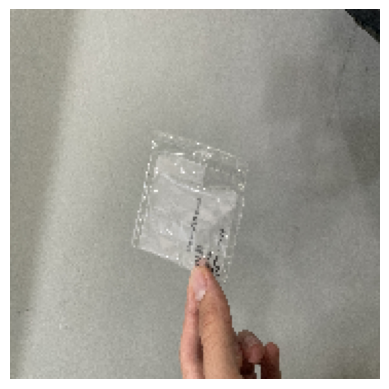

/content/drive/MyDrive/Data&AI Project/CNN Project/IMG_2952.JPG
Predicted: paper with confidence: 70.71592


In [27]:
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import numpy as np

# Path to your PNG image
img_path = '/content/drive/MyDrive/Data&AI Project/CNN Project/IMG_2952.JPG'  # or .jpg, etc.

# Load and preprocess
img = image.load_img(img_path, target_size=(180, 180))  # must match training size
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # model expects batch dimension

# Predict
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# Display
plt.imshow(img)
plt.axis('off')
plt.show()
# Show result
print(img_path)
print("Predicted:", class_names[np.argmax(score)], "with confidence:", 100 * np.max(score))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


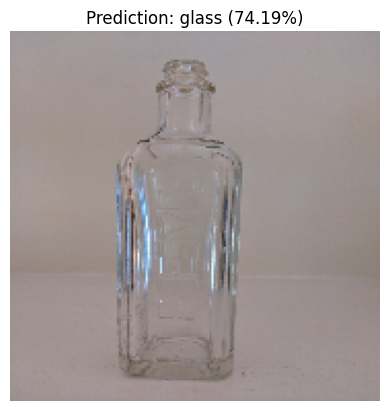

In [33]:
import random
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
from PIL import Image


# Define path to validation images (adjust if needed)
val_dir = '/content/garbage_dataset/garbage-dataset'
# class_names = train_ds.class_names  # already defined earlier

# Collect all image paths from validation set
image_paths = []
for root, dirs, files in os.walk(val_dir):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
            image_paths.append(os.path.join(root, file))

# Pick a random image
random_path = random.choice(image_paths)

# Load and preprocess the image
img = tf.keras.utils.load_img(random_path, target_size=(180, 180))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch

# Predict
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
pred_class = class_names[np.argmax(score)]

# Display
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {pred_class} ({100*np.max(score):.2f}%)")
plt.show()


In [43]:
model.output_shape

(None, 10)

In [21]:
!apt-get install -y libheif1 libheif-dev
!pip install pyheif pillow

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libheif-dev is already the newest version (1.12.0-2build1).
libheif-dev set to manually installed.
libheif1 is already the newest version (1.12.0-2build1).
libheif1 set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 50.2 MB/s eta 0:00:00


In [26]:

import pyheif
from PIL import Image

heif_file = pyheif.read('/content/drive/MyDrive/Data&AI Project/CNN Project/IMG_2941.HEIC')
image = Image.frombytes(
    heif_file.mode,
    heif_file.size,
    heif_file.data,
    "raw",
    heif_file.mode,
    heif_file.stride,
)

image.save('/content/converted_image.jpg')

In [ ]:
!zip -r /content/garbage_dataset.zip /content/garbage_dataset/garbage-dataset/

In [29]:
!cp /content/garbage_dataset.zip "/content/drive/MyDrive/Data&AI Project/CNN Project"

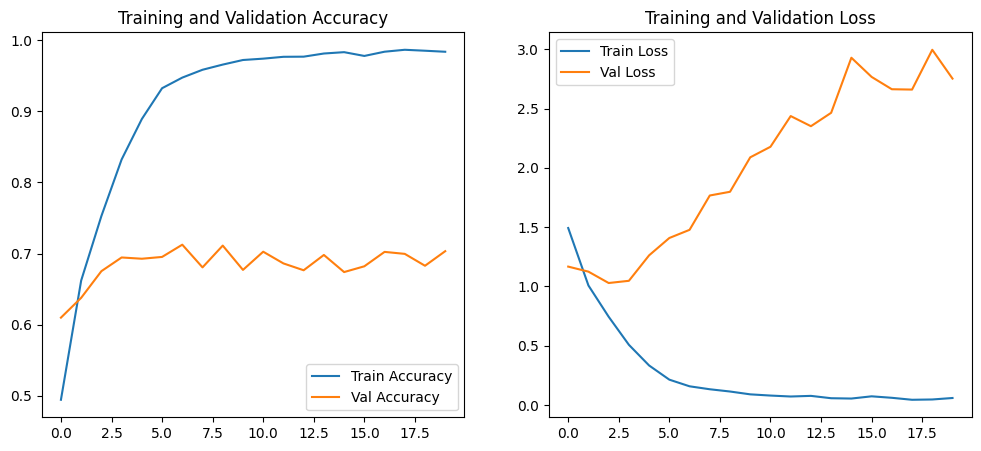

In [30]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


In [35]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, callbacks

# Optional: Clear previous session (helps avoid memory clutter in Colab)
tf.keras.backend.clear_session()

# 1️⃣ Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])

# 2️⃣ Build the Regularized Model
model = models.Sequential([
    layers.Input(shape=(180, 180, 3)),  # or (180, 180, 3) if you're using that size
    data_augmentation,
    layers.Rescaling(1./255),

    layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),

    layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),

    layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(len(class_names))  # Output layer
])

# 3️⃣ Compile the Model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# 4️⃣ EarlyStopping Callback
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# 5️⃣ Train the Model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/10
988/988 ━━━━━━━━━━━━━━━━━━━━ 101s 62ms/step - accuracy: 0.2538 - loss: 4.2995 - val_accuracy: 0.2921 - val_loss: 3.9466
Epoch 2/10
988/988 ━━━━━━━━━━━━━━━━━━━━ 136s 63ms/step - accuracy: 0.2653 - loss: 2.4377 - val_accuracy: 0.2804 - val_loss: 2.9624
Epoch 3/10
988/988 ━━━━━━━━━━━━━━━━━━━━ 89s 61ms/step - accuracy: 0.2622 - loss: 2.2583 - val_accuracy: 0.2713 - val_loss: 2.4404
Epoch 4/10
988/988 ━━━━━━━━━━━━━━━━━━━━ 92s 63ms/step - accuracy: 0.2626 - loss: 3.1077 - val_accuracy: 0.2665 - val_loss: 4.0562
Epoch 5/10
988/988 ━━━━━━━━━━━━━━━━━━━━ 136s 59ms/step - accuracy: 0.2764 - loss: 3.4719 - val_accuracy: 0.2655 - val_loss: 2.5609
Epoch 6/10
988/988 ━━━━━━━━━━━━━━━━━━━━ 89s 61ms/step - accuracy: 0.2739 - loss: 2.4450 - val_accuracy: 0.2655 - val_loss: 2.2501
Epoch 7/10
988/988 ━━━━━━━━━━━━━━━━━━━━ 91s 63ms/step - accuracy: 0.2692 - loss: 2.2202 - val_accuracy: 0.2658 - val_loss: 2.1686
Epoch 8/10
988/988 ━━━━━━━━━━━━━━━━━━━━ 91s 63ms/step - accuracy: 0.2697 - loss: 2.1619